In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-dataset/Dataset_User_Agreement.pdf
/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json


In [2]:
import json

dataset_review = '/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json'

data = []
with open(dataset_review, 'r') as file:
    for i, line in enumerate(file):
        if i >= 500000:  
            break
        data.append(json.loads(line))

# DataFrame oluşturma
df_review = pd.DataFrame(data)

df_review.head() # İlk 5 veri kontrolü

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [3]:
df_review.nunique() #Eşsiz değer kontrolü

review_id      500000
user_id        318303
business_id     14768
stars               5
useful             88
funny              57
cool               67
text           499229
date           499404
dtype: int64

In [4]:
business_review_counts = df_review["business_id"].value_counts() #Restorant yorum adeti
business_review_counts.head(10)

business_id
GBTPC53ZrG1ZBY3DT8Mbcw    3863
PY9GRfzr4nTZeINf346QOw    2071
W4ZEKkva9HpAdZG88juwyQ    1768
SZU9c8V2GuREDN5KgyHFJw    1766
vN6v8m4DO45Z4pp8yxxF_w    1737
8uF-bhJFgT4Tn6DTb27viA    1696
pSmOH4a3HNNpYM82J5ycLA    1653
UCMSWPqzXjd7QHq7v8PJjQ    1632
Zi-F-YvyVOK0k5QD7lrLOg    1577
g04aAvgol7IW8buqSbT4xA    1439
Name: count, dtype: int64

In [5]:
business_mostreviews = [business_review_counts.index[i] for i in range(5)] #İlk 5 restorantın isim idlerini listeleme
business_mostreviews

['GBTPC53ZrG1ZBY3DT8Mbcw',
 'PY9GRfzr4nTZeINf346QOw',
 'W4ZEKkva9HpAdZG88juwyQ',
 'SZU9c8V2GuREDN5KgyHFJw',
 'vN6v8m4DO45Z4pp8yxxF_w']

In [6]:
dataset_business = pd.read_json("/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json", lines="True") #Restoran veri seti
dataset_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [7]:
df_5businesses = dataset_business[dataset_business["business_id"].isin(business_mostreviews)] #içinde top 5 restoranı tut
df_5businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
957,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,1,"{'NoiseLevel': 'u'average'', 'RestaurantsReser...","Bars, Breakfast & Brunch, Restaurants, Barbequ...","{'Wednesday': '11:30-20:0', 'Thursday': '11:30..."
4497,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,333 Saint Charles Ave,New Orleans,LA,70130,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
5851,vN6v8m4DO45Z4pp8yxxF_w,Surrey's Café & Juice Bar,1418 Magazine St,New Orleans,LA,70130,29.935799,-90.071906,4.5,2084,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Vegetarian, Restaurants, Breakfast & Brunch, C...","{'Monday': '8:0-15:0', 'Thursday': '8:0-15:0',..."
9506,PY9GRfzr4nTZeINf346QOw,Peppermill Reno,2707 S Virginia St,Reno,NV,89502,39.497687,-119.801139,4.0,2486,1,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Event Planning & Services, Casinos, Beauty & S...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [8]:
df_5businessreviews = df_review[df_review["business_id"].isin(business_mostreviews)] #5 restoranta gelen yorumları filtreleme
display(df_5businessreviews["stars"].value_counts()) #verilen 5 üzerinden yıldızların adetleri
df_5businessreviews

stars
5.0    5526
4.0    3226
3.0    1175
2.0     650
1.0     628
Name: count, dtype: int64

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
37,pHwbdway4yeI-dSSmZA7-Q,qEEk0PuoH1dVa619t8fgpw,PY9GRfzr4nTZeINf346QOw,4.0,0,0,0,We checked in around 2:30 pm. Check-in was qu...,2017-09-20 16:16:47
44,jC-fGfx-YLqxVBcyTAd4Pw,EBa-0-6AKoy6jziNexDJtg,W4ZEKkva9HpAdZG88juwyQ,3.0,0,0,0,"In a word... ""OVERRATED!"". The food took fore...",2013-12-29 02:37:42
61,4zopEEPqfwm-c_FNpeHZYw,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,2016-05-31 02:14:54
108,yyrMqY7sNp5gT7KJ1AaYWA,pitYOVSsF8R1gWG1G0qxsA,GBTPC53ZrG1ZBY3DT8Mbcw,4.0,0,0,0,We have been here twice for brunch and have en...,2016-03-07 17:25:30
205,sOIEFZMEzb055tCO_tBSvQ,1xS8Jj23zHx8axIVopG3wA,W4ZEKkva9HpAdZG88juwyQ,4.0,0,0,0,Excellent. Went there for lunch (the budget o...,2011-01-09 03:52:09
...,...,...,...,...,...,...,...,...,...
499705,nzVsvWc9-7JjBcnb61Du6g,FqjoqkcKO6z92ZOFwU-keA,vN6v8m4DO45Z4pp8yxxF_w,5.0,0,0,0,Lower garden district location serves consiste...,2021-01-29 02:29:23
499779,C5pMYRkgLKxI2FtP-SO1KA,MovrzoAmd3oZG1dYZ4NDDg,SZU9c8V2GuREDN5KgyHFJw,4.0,0,0,0,I loved being able to eat seafood right on the...,2021-04-26 19:15:44
499859,yYg8ujSci1jiq0hoRD6LtQ,4vG64NIpvKMKyx2RWgVS_A,vN6v8m4DO45Z4pp8yxxF_w,5.0,0,0,0,First time visiting Surrey's and I'll have to ...,2021-02-06 21:47:34
499863,wgDLB18Lygu6B2HSCCEs7w,7J6sOvhSksLtzO9hFPEnGQ,SZU9c8V2GuREDN5KgyHFJw,4.0,32,16,33,"It's a bit touristy, but unlike a lot of touri...",2020-03-18 12:38:00


In [9]:
pd.set_option('display.max_colwidth', 200) # text kolonunu daha rahat görmek için
def df_analyze(dataframe):
  # DataFrame'i analiz ettiği ve temel bilgilerin sunulduğu fonksiyon

  display("DataFrame Information:")
  dataframe.info()

  display("First 5 Rows:")
  display(dataframe.head())

  display("Unique Values:")
  unique_values = {column: dataframe[column].nunique() for column in dataframe.columns}
  display(unique_values)

  display("Total Null Values:")
  display(dataframe.isnull().sum())

In [10]:
df_analyze(df_5businessreviews)

'DataFrame Information:'

<class 'pandas.core.frame.DataFrame'>
Index: 11205 entries, 37 to 499886
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    11205 non-null  object 
 1   user_id      11205 non-null  object 
 2   business_id  11205 non-null  object 
 3   stars        11205 non-null  float64
 4   useful       11205 non-null  int64  
 5   funny        11205 non-null  int64  
 6   cool         11205 non-null  int64  
 7   text         11205 non-null  object 
 8   date         11205 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 875.4+ KB


'First 5 Rows:'

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
37,pHwbdway4yeI-dSSmZA7-Q,qEEk0PuoH1dVa619t8fgpw,PY9GRfzr4nTZeINf346QOw,4.0,0,0,0,We checked in around 2:30 pm. Check-in was quick and easy with complimentary valet parking (always appreciated). The Peppermill is huge and reminded us of the Caesars Palace in Las Vegas. They ...,2017-09-20 16:16:47
44,jC-fGfx-YLqxVBcyTAd4Pw,EBa-0-6AKoy6jziNexDJtg,W4ZEKkva9HpAdZG88juwyQ,3.0,0,0,0,"In a word... ""OVERRATED!"". The food took forever to come out. The burger was WAY overcooked (Especially when I ordered it Medium Rare) and the Seafood Jumbalaya was Decent. Not worth the price....",2013-12-29 02:37:42
61,4zopEEPqfwm-c_FNpeHZYw,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,"We were a bit weary about trying the Shellfish Company on the Wharf as more often than not, many places like these (see Cannery Row, Monterey) feast on a captive audience and provide sub-standard ...",2016-05-31 02:14:54
108,yyrMqY7sNp5gT7KJ1AaYWA,pitYOVSsF8R1gWG1G0qxsA,GBTPC53ZrG1ZBY3DT8Mbcw,4.0,0,0,0,"We have been here twice for brunch and have enjoyed it immensely. Everything we have tried has been delicious, particularly the grits with scallions and sour cream. But the room is always freezing...",2016-03-07 17:25:30
205,sOIEFZMEzb055tCO_tBSvQ,1xS8Jj23zHx8axIVopG3wA,W4ZEKkva9HpAdZG88juwyQ,4.0,0,0,0,Excellent. Went there for lunch (the budget option). Prix fixe menu was tempting. Wife had the prime rib po'boy with the soup of the day (tomato fennel). Both were excellent (the po'boy being ...,2011-01-09 03:52:09


'Unique Values:'

{'review_id': 11205,
 'user_id': 10630,
 'business_id': 5,
 'stars': 5,
 'useful': 30,
 'funny': 23,
 'cool': 26,
 'text': 11190,
 'date': 11204}

'Total Null Values:'

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [11]:
df_5businesses=df_5businesses.drop(columns=["attributes","hours"])
df_analyze(df_5businesses)

'DataFrame Information:'

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 141 to 9506
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   5 non-null      object 
 1   name          5 non-null      object 
 2   address       5 non-null      object 
 3   city          5 non-null      object 
 4   state         5 non-null      object 
 5   postal_code   5 non-null      object 
 6   latitude      5 non-null      float64
 7   longitude     5 non-null      float64
 8   stars         5 non-null      float64
 9   review_count  5 non-null      int64  
 10  is_open       5 non-null      int64  
 11  categories    5 non-null      object 
dtypes: float64(3), int64(2), object(7)
memory usage: 520.0+ bytes


'First 5 Rows:'

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"Live/Raw Food, Restaurants, Seafood, Beer Bar, Beer, Wine & Spirits, Bars, Food, Nightlife"
957,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,1,"Bars, Breakfast & Brunch, Restaurants, Barbeque, Cajun/Creole, Cafes, Cocktail Bars, Nightlife"
4497,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,333 Saint Charles Ave,New Orleans,LA,70130,29.950742,-90.070416,4.0,4554,1,"German, Restaurants, Seafood, Cocktail Bars, French, Brasseries, American (New), Nightlife, Bars, Cajun/Creole, Breakfast & Brunch"
5851,vN6v8m4DO45Z4pp8yxxF_w,Surrey's Café & Juice Bar,1418 Magazine St,New Orleans,LA,70130,29.935799,-90.071906,4.5,2084,1,"Vegetarian, Restaurants, Breakfast & Brunch, Cafes, Juice Bars & Smoothies, Sandwiches, Food"
9506,PY9GRfzr4nTZeINf346QOw,Peppermill Reno,2707 S Virginia St,Reno,NV,89502,39.497687,-119.801139,4.0,2486,1,"Event Planning & Services, Casinos, Beauty & Spas, Venues & Event Spaces, Arts & Entertainment, Day Spas, Hotels, Hotels & Travel"


'Unique Values:'

{'business_id': 5,
 'name': 5,
 'address': 5,
 'city': 3,
 'state': 3,
 'postal_code': 3,
 'latitude': 5,
 'longitude': 5,
 'stars': 2,
 'review_count': 5,
 'is_open': 1,
 'categories': 5}

'Total Null Values:'

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
dtype: int64

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Stopwords ve lemmatizer yükleme
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
import zipfile
import os

# NLTK'nin veri yolunu bul
nltk_path = nltk.data.find('corpora').path
wordnet_zip_path = os.path.join(nltk_path, 'wordnet.zip')  # wordnet.zip dosyasının yolu
wordnet_extracted_path = os.path.join(nltk_path, 'wordnet')  # Çıkartılacak dizin

# Eğer wordnet klasörü yoksa zip dosyasını çıkar
if not os.path.exists(wordnet_extracted_path):
    with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
        zip_ref.extractall(nltk_path)
    print("WordNet başarıyla çıkarıldı!")

# Kontrol
print(f"WordNet dosyaları: {os.listdir(wordnet_extracted_path)}")

WordNet dosyaları: ['citation.bib', 'verb.exc', 'index.verb', 'data.adv', 'README', 'noun.exc', 'LICENSE', 'index.adj', 'index.sense', 'adv.exc', 'data.verb', 'index.noun', 'data.adj', 'index.adv', 'adj.exc', 'lexnames', 'cntlist.rev', 'data.noun']


In [14]:
def cleaning_text(text):
  # Noktalama işaretlerini ve sayıları ve fazladan boşlukları kaldırma
  text = re.sub(r"[^\w\s]", "", text)  # Noktalama
  text = re.sub(r"\d+", "", text)      # Sayılar
  text = re.sub(r"\s+", " ", text.strip()) # Fazladan boşluklar
  text = text.lower()
  # Stopwords kaldır ve lemmatize et
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
  return text

In [15]:
# Reviews tablosundaki yorumları temizleme
df_5businessreviews.loc[:, 'cleaned_text'] = df_5businessreviews['text'].apply(cleaning_text)
# Temizlenmiş veriyi kontrol
df_5businessreviews[['text', 'cleaned_text']].head()

/tmp/ipykernel_919/3786472636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5businessreviews.loc[:, 'cleaned_text'] = df_5businessreviews['text'].apply(cleaning_text)


,text,cleaned_text
37,We checked in around 2:30 pm. Check-in was quick and easy with complimentary valet parking (always appreciated). The Peppermill is huge and reminded us of the Caesars Palace in Las Vegas. They ...,checked around pm checkin quick easy complimentary valet parking always appreciated peppermill huge reminded u caesar palace la vega around eight restaurant site offering almost type food could wa...
44,"In a word... ""OVERRATED!"". The food took forever to come out. The burger was WAY overcooked (Especially when I ordered it Medium Rare) and the Seafood Jumbalaya was Decent. Not worth the price....",word overrated food took forever come burger way overcooked especially ordered medium rare seafood jumbalaya decent worth price better place eat french quarter horrible everything heard place woul...
61,"We were a bit weary about trying the Shellfish Company on the Wharf as more often than not, many places like these (see Cannery Row, Monterey) feast on a captive audience and provide sub-standard ...",bit weary trying shellfish company wharf often many place like see cannery row monterey feast captive audience provide substandard fare high price however emboldened perennial good review yelp sup...
108,"We have been here twice for brunch and have enjoyed it immensely. Everything we have tried has been delicious, particularly the grits with scallions and sour cream. But the room is always freezing...",twice brunch enjoyed immensely everything tried delicious particularly grit scallion sour cream room always freezing sure bring sweater
205,Excellent. Went there for lunch (the budget option). Prix fixe menu was tempting. Wife had the prime rib po'boy with the soup of the day (tomato fennel). Both were excellent (the po'boy being ...,excellent went lunch budget option prix fixe menu tempting wife prime rib poboy soup day tomato fennel excellent poboy upscale interpretation gruyere really good horseradish sauce seafood jamabala...


In [23]:
#Restoran yorumlarınlarında kullanılan kelime adetlerini dataframe haline getirme
tf = df_5businessreviews["cleaned_text"].apply(lambda x: pd.Series(x.split(" ")).value_counts()).sum(axis=0).reset_index()

In [24]:
tf

,index,0
0,area,936.0
1,huge,750.0
2,large,583.0
3,room,3916.0
4,tv,265.0
...,...,...
3946,tony,13.0
3947,turducken,12.0
3948,covid,40.0
3949,mask,42.0


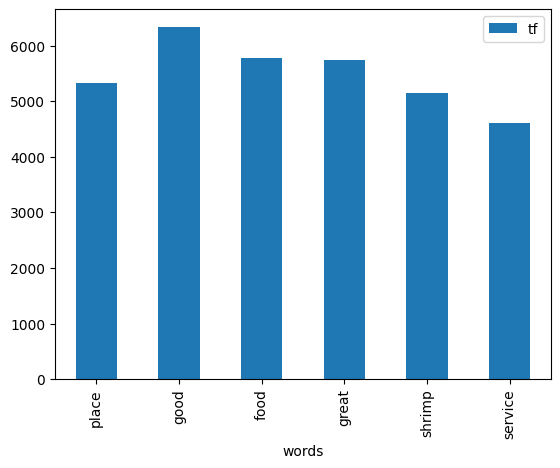

In [27]:
import matplotlib.pyplot as plt
tf.columns = ["words", "tf"]
tf[tf["tf"] > 4000].plot.bar(x="words", y="tf")
plt.show()

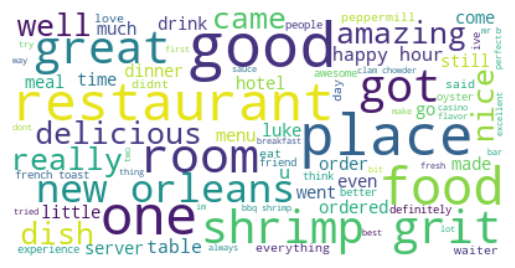

In [30]:
from wordcloud import WordCloud
text = " ".join(i for i in df_5businessreviews.cleaned_text)

wordcloud = WordCloud(max_font_size=50,
                      max_words=80,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
df_5business_2 = df_5businesses.copy()
df_5businessreviews_2 = df_5businessreviews.copy()

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# Tokenizer ve model yükleme
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
text_list_2 = df_5businessreviews_2["text"].tolist() #yorumların tek liste altına alma

In [22]:
batch_size = 1000  # Her seferde 1000 yorum işlenecek
predicted_classes = []

for i in range(0, len(text_list_2), batch_size):
    batch = text_list_2[i:i + batch_size]
    inputs = tokenizer(
        batch,
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    )
    with torch.no_grad():
        logits = model(**inputs).logits
        predicted_classes.extend(logits.argmax(dim=-1).tolist())

In [23]:
from transformers import pipeline

# Özetleme modeli
summarizer = pipeline("summarization", model="t5-large")

# dictionary kısmını oluşturmak için
restaurant_summaries = {}

for restaurant_id, group in df_5businessreviews_2.groupby("business_id"):
    # Restoranın tüm yorumlarını birleştir
    combined_reviews = " ".join(group["text"].tolist())

    # Çok uzun metinler için kesme işlemi (T5'nin sınırları var)
    if len(combined_reviews.split()) > 500:
        combined_reviews = " ".join(combined_reviews.split()[:500])  # İlk 500 kelimeyi al

    # Özetleme
    summary = summarizer(combined_reviews, max_length=50, min_length=20, do_sample=False)

    # Restoran ID'yi özetle eşleştirme
    restaurant_summaries[restaurant_id] = summary[0]['summary_text']

for restaurant_id, summary in restaurant_summaries.items():
    print(f"Restaurant ID: {restaurant_id}")
    print(f"Summary: {summary}")
    print("-" * 50)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Restaurant ID: GBTPC53ZrG1ZBY3DT8Mbcw
Summary: the raw bar was fantastic. Those were the best Alaskan crab legs i've had . service was spot on. Professional but not overbearing or obvious . bread and butter at the table was excellent. Crun
--------------------------------------------------
Restaurant ID: PY9GRfzr4nTZeINf346QOw
Summary: the Peppermill is rated the casino with the loosest slots in casino . the rooms are stellar for the price, and there weren't any bed bugs in our bed . they have eight restaurants on site offering almost any type
--------------------------------------------------
Restaurant ID: SZU9c8V2GuREDN5KgyHFJw
Summary: the rock crab special at the shellfish company on the wharf was a great value . the crab was huge, delicious and meaty, and the salad and soup were fresh . if you're looking for a
--------------------------------------------------
Restaurant ID: W4ZEKkva9HpAdZG88juwyQ
Summary: the burger was WAY overcooked and the seafood jumbalaya was Decent . the b

In [24]:
# Modelin ürettiği özetler
predictions = [
    "the raw bar was fantastic. Those were the best Alaskan crab legs i've had . service was spot on. Professional but not overbearing or obvious . bread and butter at the table was excellent.",
    "the Peppermill is rated the casino with the loosest slots in casino . the rooms are stellar for the price, and there weren't any bed bugs in our bed . they have eight restaurants on site offering almost any type",
    "the rock crab special at the shellfish company on the wharf was a great value . the crab was huge, delicious and meaty, and the salad and soup were fresh.",
    "the burger was WAY overcooked and the seafood jumbalaya was Decent . the bread pudding was a tad dry in the city that's supposed to be the mother lode of bread pudding.",
    "the shrimp and grits are hands down the best we've had in the city . the lump crab omelette with the sauce was just the cure for a dull grey rainy morning."
]

# İnsan tarafından hazırlanmış özet
references = [
    "The raw bar was amazing with fantastic Alaskan crab legs and excellent bread and butter.",
    "Peppermill is known for its loose slot machines, clean rooms, and diverse on-site dining options.",
    "The shellfish company serves large, delicious rock crab with fresh salad and soup, offering great value.",
    "The burger was overcooked, seafood jumbalaya was decent, and the bread pudding was a bit dry.",
    "Shrimp and grits were exceptional, and the crab omelette was perfect for a rainy morning."
]


In [25]:
from nltk.translate.bleu_score import corpus_bleu

# BLEU Skoru Hesaplama
bleu_score = corpus_bleu([[ref.split()] for ref in references], [pred.split() for pred in predictions])
print(f"BLEU Score: {bleu_score:.4f}")

BLEU Score: 0.0629


In [28]:
#!pip install rouge
from rouge import Rouge

# ROUGE Skoru Hesaplama
rouge = Rouge()
scores = rouge.get_scores(predictions, references, avg=True)
print("ROUGE Scores:")
print(f"ROUGE-1: {scores['rouge-1']}")
print(f"ROUGE-2: {scores['rouge-2']}")
print(f"ROUGE-L: {scores['rouge-l']}")

ROUGE Scores:
ROUGE-1: {'r': 0.6211904761904762, 'p': 0.36435578913839783, 'f': 0.4565336719233276}
ROUGE-2: {'r': 0.31714285714285706, 'p': 0.15452559185595893, 'f': 0.20747667767569716}
ROUGE-L: {'r': 0.5283333333333333, 'p': 0.30172638955247655, 'f': 0.38214499753465325}
